In [1]:
import numpy as np
import pandas as pd

#modules for statistics
import math
import statistics
from scipy import stats

# Mean, Median, Mode, and Central Tendency

mean = average, balance point
      = sum of all numbers/ total number of values
      = arithmetic mean
      outliers impact mean a decent amount
      
median = middle number when the all the values are put in order. outliers dont impact the median very much

mode = number that occurs most often

In [3]:
belize_listings_path = "belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listings_path)
belize_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


In [4]:
# get price, minimum_nights, and number or reviews only
#and find mean of all
belize_df[["price","minimum_nights","number_of_reviews"]].mean()

price                357.102289
minimum_nights         2.263948
number_of_reviews     14.453505
dtype: float64

In [5]:
belize_df[["price","minimum_nights","number_of_reviews"]].median()

price                220.0
minimum_nights         2.0
number_of_reviews      2.0
dtype: float64

In [6]:
belize_df[["price","minimum_nights","number_of_reviews"]].mode()

,price,minimum_nights,number_of_reviews
0,151,1.0,0.0
1,252,NaN,NaN


Text(0, 0.5, 'frequency')

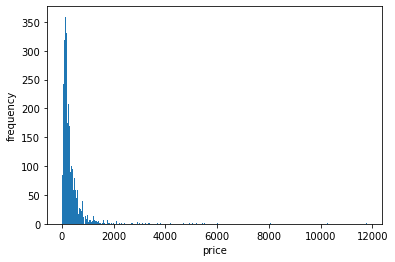

In [7]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=belize_df['price'], bins='auto')
plt.xlabel('price')
plt.ylabel('frequency')

# Variance 

Variance measures how dispersed data points are from the mean. Low variance means the data points are pretty tightly clustered around the mean. High variance means the data points are pretty spread out from the mean.

Variance is like saying the data points are on average x away from the mean.

Variance of 0 means that all the data is the same

Degrees of freedom = number of independent pieces of information

In [8]:
#variance function
def variance(data,ddof=0):
    n = len(data)
    mean = sum(data)/n
    return sum((x-mean)**2 for x in data)/(n-ddof)

In [9]:
#population variance
variance(belize_df['price'])

316996.1526270922

In [10]:
statistics.pvariance(belize_df['price'])

316996.15262709244

In [11]:
#sample variance
variance(belize_df['price'],ddof=1)

317109.56806631474

In [13]:
statistics.variance(belize_df['price'])

317109.568066315

# Standard Deviation

standard deviation is the square root of the variance.

Why? because square dollars dont make sense. We need to get rid of that squared value so we have an intuitive understanding of what we're talking about. 

Tells you how far, on average, each value lies from the mean

In [14]:
#population standard deviation
statistics.pstdev(belize_df['price'])

563.0241137172478

In [15]:
#sample standard devation 
statistics.stdev(belize_df['price'])

563.1248245871558

# Covariance and Correlation

Covariance is to correlation what variance is to standard deviation 

Covariance tells us how much and to what extent two random variables change together. In other words: how much will one variable change as another variable changes.

Positive = variables changing in same direction

Negative = variables changing in the opposite direction

Correlation tells us how strong the relationship is between the variables

correlation = (covariance of x and y)/((standard deviation of x)(standard deviation of y))

In [16]:
np.cov(belize_df['number_of_reviews'],belize_df['price'])

array([[   919.77350828,  -2055.7279794 ],
       [ -2055.7279794 , 317109.56806632]])

In [17]:
np.corrcoef(belize_df['number_of_reviews'],belize_df['price'])

array([[ 1.        , -0.12037063],
       [-0.12037063,  1.        ]])

# Aggregate Functions

In [19]:
belize_df.agg(["mean","std"])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
mean,2.792490e+07,1.240278e+08,17.448295,-88.292035,357.102289,2.263948,14.453505,0.538088,22.848355,280.315451
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632


# Manual Covariance Function

In [20]:
def covariance(x, y):
    #means
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    
    #subtract mean from each value in each row
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

In [24]:
cov_reviews_availability = covariance(belize_df['number_of_reviews'],belize_df['price'])
cov_reviews_availability

-2055.7279794032315

In [25]:
cov_reviews_availability/(statistics.stdev(belize_df['number_of_reviews'])*statistics.stdev(belize_df['price']))

-0.1203706277634962

In [26]:
np.cov(belize_df['number_of_reviews'],belize_df['price'])

array([[   919.77350828,  -2055.7279794 ],
       [ -2055.7279794 , 317109.56806632]])

In [27]:
np.corrcoef(belize_df['number_of_reviews'],belize_df['price'])

array([[ 1.        , -0.12037063],
       [-0.12037063,  1.        ]])